In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='25a646a5-0331-490f-9ed5-aae4c6cb1a20', project_access_token='p-fcb1a4c0800f6f0ef6417e06be9386b9a8ecb5da')
pc = project.project_context

In [2]:
import os, types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_0b7ca400e37d4fadbec285dc88fe8085 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_0b7ca400e37d4fadbec285dc88fe8085 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_0b7ca400e37d4fadbec285dc88fe8085 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9yc_qeu-sbUjLV6omQ30W1tVPjMIwe8rYc-n37pet4wU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_0b7ca400e37d4fadbec285dc88fe8085)

body = client_0b7ca400e37d4fadbec285dc88fe8085.get_object(Bucket='modelbuilding-donotdelete-pr-tl8qc5x7ggcytz',
                                                          Key='OTT_VS_TV.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [3]:
df = pd.read_csv(body)
df.head()

Age Occupation Where do you live ?  \
0  11-20    Student             Central   
1  11-20    Student             Central   
2  11-20    Student             Central   
3  11-20    Student             Central   
4  11-20    Student             Central   

  How much time do you approximately spend on OTT platforms daily ?  \
0                                            3-5 hrs                  
1                                            1-3 hrs                  
2                                            1-3 hrs                  
3                                            3-5 hrs                  
4                                            1-3 hrs                  

  How much time do you approximately spend on TV  daily ?  \
0                                        Don't watch        
1                                            1-3 hrs        
2                                        Don't watch        
3                                        Don't watch        
4                                        Don't watch        

  Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Amazon Prime]  \
0                                        Don't Watch                                                                   
1                                                  5                                                                   
2                                                  4                                                                   
3                                                  4                                                                   
4                                                  3                                                                   

  Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Netflix]  \
0                                        Don't Watch                                                              
1                                        Don't Watch                                                              
2                                                  5                                                              
3                                                  4                                                              
4                                                  5                                                              

  Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Disney + Hotstar]  \
0                                        Don't Watch                                                                       
1                                        Don't Watch                                                                       
2                                                  3                                                                       
3                                                  3                                                                       
4                                                  3                                                                       

  Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Voot ]  \
0                                                  1                                                            
1                                        Don't Watch                                                            
2                                                  1                                                            
3                                                  3                                                            
4                                                  4                                                            

  Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [YouTube]  \
0

## Converting 'Age' to float
* This can be done by using mean age 
* Mean age is the approximate range for table

In [4]:
platforms = []

In [5]:
df.loc[df['Age'] == 'Below 10','Age'] = '5-10'

In [6]:
val = df['Age'].unique()[2]

In [7]:
df.loc[df['Age'] == val,'Age'] = '50-100'

In [8]:
df['Age']= df['Age'].str.split('-').apply(lambda x: np.random.randint(int(x[0]),int(x[1])))

In [9]:
df['Time_Spent'] = df['How much time do you approximately spend on OTT platforms daily ?']
del df['How much time do you approximately spend on OTT platforms daily ?']

In [10]:
chng = df['Time_Spent'].unique()[3]
wtch = df['Time_Spent'].unique()[4]

In [11]:
df.loc[df['Time_Spent'] == chng,'Time_Spent'] = '9-12 hrs'

In [12]:
df.loc[df['Time_Spent'] == wtch, 'Time_Spent'] = '0-1 hrs'

In [13]:
df['Time_Spent'] = df['Time_Spent'].str[:-4]

In [14]:
df['Time_Spent'].unique()

array(['3-5', '1-3', '5-7', '9-12', '0-1', '7-9'], dtype=object)

In [15]:
df['Time_Spent'] = df['Time_Spent'].str.split('-').apply(lambda x: np.random.uniform(int(x[0]),int(x[1])))

In [16]:
df.sample(10)

Age         Occupation Where do you live ?  \
307   11            Student             Central   
394   17            Student             Central   
469   11            Student             Central   
50    16            Student             Central   
463   16            Student             Central   
39    19            Student             Central   
90    49  Full time working             Central   
151   26  Full time working             Harbour   
419   13            Student             Central   
226   18            Student             Harbour   

    How much time do you approximately spend on TV  daily ?  \
307                                            1-3 hrs        
394                                        Don't watch        
469                                        Don't watch        
50                                             1-3 hrs        
463                                            5-7 hrs        
39                                             1-3 hrs        
90                                             1-3 hrs        
151                                        Don't watch        
419                                            1-3 hrs        
226                                            1-3 hrs        

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Amazon Prime]  \
307                                                  3                                                                   
394                                                  4                                                                   
469                                                  2                                                                   
50                                                   4                                                                   
463                                        Don't Watch                                                                   
39                                                   5                                                                   
90                                         Don't Watch                                                                   
151                                                  4                                                                   
419                                        Don't Watch                                                                   
226                                                  5                                                                   

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Netflix]  \
307                                                  3                                                              
394                                                  5                                                              
469                                        Don't Watch                                                              
50                                                   5                                                              
463                                        Don't Watch                                                              
39                                                   5                                                              
90                                         Don't Watch                                                              
151                                                  5                                                              
419                                        Don't Watch                                                              
226                                                  5                                                              

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Disney + Hots

In [17]:
df.loc[df['How much time do you approximately spend on TV  daily ?'] == wtch,
   'How much time do you approximately spend on TV  daily ?'] = '0-1 hrs'

In [18]:
df['Time_Spent_TV'] = df['How much time do you approximately spend on TV  daily ?']
del df['How much time do you approximately spend on TV  daily ?']

In [19]:
df.loc[df['Time_Spent_TV'] == chng,'Time_Spent_TV'] = '9-12 hrs'

In [20]:
df['Time_Spent_TV'] = df['Time_Spent_TV'].str[:-4]

In [21]:
df['Time_Spent_TV'] = df['Time_Spent_TV'].str.split('-').apply(lambda x: np.random.uniform(int(x[0]),int(x[1])))

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lbl = LabelEncoder()

In [24]:
su = 0

In [25]:
for i in df['Have you started watching OTT more due to lockdown ?']:
    if i == 'Yes':
        su+=1

In [26]:
mn = su/df.shape[0]

In [27]:
import numpy as np

In [28]:
df['Have you started watching OTT more due to lockdown ?'] = df['Have you started watching OTT more due to lockdown ?'].astype(str)

In [29]:
df['Have you started watching OTT more due to lockdown ?'] = lbl.fit_transform(df['Have you started watching OTT more due to lockdown ?'])

In [30]:
df['OTT during Lockdown'] = df['Have you started watching OTT more due to lockdown ?']

In [31]:
del df['Have you started watching OTT more due to lockdown ?']

In [32]:
df.loc[df['OTT during Lockdown'] == 2,'OTT during Lockdown'] = mn

In [33]:
df['OTT wins TV'] = df['Are OTT platforms more convenient than TV ?']
del df['Are OTT platforms more convenient than TV ?']

In [34]:
df['OTT wins TV'] = df['OTT wins TV'].astype(str)

In [35]:
df['OTT wins TV'] = lbl.fit_transform(df['OTT wins TV'])

In [36]:
su = 0

In [37]:
for i in df['OTT wins TV']:
    if i == 1:
        su+=1

In [38]:
mn = su/df.shape[0]

In [39]:
df.loc[df['OTT wins TV'] == 2,'OTT wins TV'] = mn

In [40]:
val = None

In [41]:
df.sample(10)

Age         Occupation Where do you live ?  \
251   13            Student             Central   
78    38  Full time working             Western   
227   16            Student             Central   
303   80  Full time working             Central   
51    29  Full time working             Central   
54    12            Student             Central   
309   15            Student             Central   
94    11            Student             Harbour   
220   14            Student             Central   
83    12            Student             Central   

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Amazon Prime]  \
251                                                  5                                                                   
78                                                   3                                                                   
227                                                  3                                                                   
303                                        Don't Watch                                                                   
51                                                   3                                                                   
54                                         Don't Watch                                                                   
309                                                  3                                                                   
94                                         Don't Watch                                                                   
220                                        Don't Watch                                                                   
83                                         Don't Watch                                                                   

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Netflix]  \
251                                                  5                                                              
78                                                   4                                                              
227                                                  4                                                              
303                                        Don't Watch                                                              
51                                                   3                                                              
54                                         Don't Watch                                                              
309                                                  4                                                              
94                                         Don't Watch                                                              
220                                        Don't Watch                                                              
83                                                   5                                                              

    Rate the following OTT platforms according to your preference.(1= least preferred,5=Most preferred) [Disney + Hotstar]  \
251                                                  5                                                                       
78                                                   5                                                                       
227                                                  4                                                                       
303                                        Don't Watch                                                                       
51                                                   2                                                                       
54                                         Don't Watch  

In [42]:
for x in df.filter(regex=('R.*')):
    if val is None:
        val = df[x].unique()[0]
    if val is not None:
        df.loc[df[x] == val,x] = '0'

In [43]:
for x in df.filter(regex=('R.*')):
    platforms.append(x.split('[')[-1][:-1])
    df[x.split('[')[-1][:-1]] = df[x]
    del df[x]

In [44]:
del df['Which OTT platform do you prefer other than the above specified ?']

In [45]:
vals = df['How much do you pay for TV on monthly basis ?'].values

In [46]:
su = 0

In [47]:
for w in range(vals.shape[0]):
    if str(vals[w]) == 'nan':
        df.loc[w, 'How much do you pay for TV on monthly basis ?'] = np.nan
        continue
    ans = np.nan
    for fx in str(vals[w]).split(' '):
        try:
            ans = int(fx)
            break
        except:
            pass
    if type(ans) == int:
        su+=ans
    df.loc[w,'How much do you pay for TV on monthly basis ?'] = ans

In [48]:
mean = su/vals.shape[0]

In [49]:
su = 0

In [50]:
vals = df['How much do you pay for OTT platforms on monthly basis ?']

In [51]:
for w in range(vals.shape[0]):
    if str(vals[w]) == 'nan':
        df.loc[w, 'How much do you pay for OTT platforms on monthly basis ?'] = np.nan
        continue
    ans = np.nan
    for fx in str(vals[w]).split(' '):
        try:
            ans = int(fx)
            break
        except:
            pass
    if type(ans) == int:
        su+=ans
    df.loc[w,'How much do you pay for OTT platforms on monthly basis ?'] = ans

In [52]:
mean2 = su/vals.shape[0]

In [53]:
mid = pd.get_dummies(df['Occupation'])

In [54]:
df[list(mid.columns)] = mid

In [55]:
del df['Occupation']

In [56]:
mid = pd.get_dummies(df['Where do you live ?'])
df[list(mid.columns)] = mid
del df['Where do you live ?']

In [57]:
df['How much do you pay for TV on monthly basis ?'].fillna(value=mean, inplace=True)

In [58]:
df['How much do you pay for OTT platforms on monthly basis ?'].fillna(value=mean2, inplace=True)

In [59]:
df['Which television provider do you prefer the most ?'] = df['Which television provider do you prefer the most ?'].str[:]

In [60]:
mid = pd.get_dummies(df['Which television provider do you prefer the most ?'])

In [61]:
df[list(mid.columns)] = mid
del df['Which television provider do you prefer the most ?']

In [62]:
vals = df['What would you prefer to watch and does it affect your studies/work ?']

In [63]:
df['mode'] = np.nan

In [64]:
df['Affect'] = np.nan

In [65]:
su = 0

In [66]:
df['What would you prefer to watch and does it affect your studies/work ?'][1]

"I prefer OTT but it doesn't affect."

In [67]:
for x in vals:
    if str(x) == 'nan':
        continue
    if str(x).find('OTT') != -1:
        df['mode'] = 1
        su+=1
    elif str(x).find('TV') != -1:
        df['mode'] = 0
    if str(x).find('it affects') != -1:
        df['Affect'] = 0
    elif str(x).find("it doesn't affect") != -1:
        df['Affect'] = 1

In [68]:
means = su/vals.shape[0]

In [69]:
df['mode'].fillna(value=means,inplace=True)

In [70]:
df['Affect'].fillna(value=means,inplace=True)

In [71]:
del df['What would you prefer to watch and does it affect your studies/work ?']

In [72]:
for cols in df.columns:
    if df[cols].dtype == np.object:
        df[cols] = df[cols].astype(float)

In [73]:
rev_search = {i:j for i,j in enumerate(platforms)}

In [74]:
df['Platform_preffered'] = ''

In [75]:
rev_search

{0: 'Amazon Prime',
 1: 'Netflix',
 2: 'Disney + Hotstar',
 3: 'Voot ',
 4: 'YouTube'}

## Clashes
* If clashes were found then following heirchay:<br>
    1 YouTube <br>
    2 Netflix <br>
    3 Prime <br>
    4 Hotstar <br>
    5 Voot <br>
* Above rankings are based on general market trend and analysis done earlier

In [76]:
for i in range(df.shape[0]):
    lst = []
    for j in platforms:
        lst.append(df.loc[i,j])
    fnd = max(lst)
    indexes = []
    for x in range(5):
        if lst[x] == fnd:
            indexes.append(x)
    if fnd == 0.0:
        df.loc[i, 'Platform_preffered'] = 'None'
    elif len(indexes) == 1:
        df.loc[i,'Platform_preffered'] = rev_search[indexes[0]]
    elif len(indexes) == 5:
        df.loc[i, 'Platform_preffered'] = 'Any'
    else:
        try:
            indexes.index(4)
            df.loc[i,'Platform_preffered'] = rev_search[4]
        except:
            try:
                indexes.index(1)
                df.loc[i,'Platform_preffered'] = rev_search[1]
            except:
                try:
                    indexes.index(0)
                    df.loc[i,'Platform_preffered'] = rev_search[0]
                except:    
                    try:
                        indexes.index(2)
                        df.loc[i,'Platform_preffered'] = rev_search[2]
                    except:
                        df.loc[i,'Platform_preffered'] = rev_search[3]

In [77]:
df['Platform_preffered'].unique()

array(['YouTube', 'Netflix', 'Disney + Hotstar', 'Amazon Prime', 'None',
       'Voot ', 'Any'], dtype=object)

In [78]:
for pf in platforms:
    del df[pf]

In [79]:
df['plots'] = lbl.fit_transform(df['Platform_preffered'])

In [80]:
df.sample(10)

Age  How much do you pay for OTT platforms on monthly basis ?  \
389   15                                         149.872832          
91    32                                         149.872832          
362   18                                         200.000000          
359   17                                         600.000000          
349   23                                        1000.000000          
52    17                                         500.000000          
495   11                                         500.000000          
46    86                                         149.872832          
378   26                                        1000.000000          
88    24                                         200.000000          

     How much do you pay for TV on monthly basis ?  Time_Spent  Time_Spent_TV  \
389                                     300.000000    2.472867       0.580144   
91                                      219.373796    1.164343       1.039397   
362                                     245.000000    2.229630       1.253026   
359                                    1000.000000    5.164362       2.152937   
349                                     219.373796    2.390976       1.669009   
52                                      200.000000    1.990097       1.902437   
495                                     400.000000    6.963656       4.346502   
46                                      219.373796    1.433171       0.616562   
378                                     500.000000    0.585339       2.483471   
88                                      400.000000    3.695552       3.094492   

     OTT during Lockdown  OTT wins TV  Full time working  Housewife  \
389                  1.0          1.0                  0          0   
91                   1.0          1.0                  1          0   
362                  1.0          0.0                  0          0   
359                  1.0          1.0                  0          0   
349                  1.0          1.0                  1          0   
52                   1.0          1.0                  0          0   
495                  0.0          1.0                  0          0   
46                   0.0          1.0                  1          0   
378                  0.0          1.0                  0          0   
88                   0.0          1.0                  0          1   

     Part time working  ...  Central  Harbour  Western  \
389                  0  ...        1        0        0   
91                   0  ...        1        0        0   
362                  0  ...        1        0        0   
359                  0  ...        0        0        1   
349                  0  ...        1        0        0   
52                   0  ...        0        1        0   
495                  0  ...        1        0        0   
46                   0  ...        0        0        1   
378                  0  ...        0        1        0   
88                   0  ...        0        1        0   

     Dish TV(Tata aky, Airtel, etc)  Don't watch  Local cable  mode  Affect  \
389                               0            1            0     1       1   
91                                1            0            0     1       1   
362                               0            0            1     1       1   
359                               0            0            1     1       1   
349                               0            0            1     1       1   
52                                1            0            0     1       1   
495                               1            0            0     1       1   
46                                0            1            0     1       1   
378                               0            0            1     1       1   
88                                1            0            0     1       1   

     Platform_preffered  plots  
389             Yo

<AxesSubplot:>

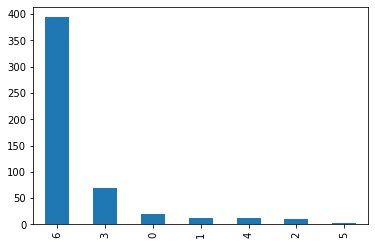

In [81]:
df['plots'].value_counts().plot(kind='bar')

In [82]:
!pip install imbalanced-learn

In [83]:
df = df[df['Platform_preffered'] != 'Voot ']

In [84]:
df['Platform_preffered'].value_counts()/519

YouTube             0.759152
Netflix             0.132948
Amazon Prime        0.036609
Any                 0.023121
None                0.023121
Disney + Hotstar    0.019268
Name: Platform_preffered, dtype: float64

In [85]:
del df['plots']

In [86]:
0.005780/0.759152

0.007613758509494805

In [87]:
from imblearn.over_sampling import KMeansSMOTE
km = KMeansSMOTE(cluster_balance_threshold=6e-7,n_jobs=-1,random_state=42)

In [88]:
new_df, df2 = km.fit_resample(df.iloc[:,:-1], df.iloc[:,-1])

In [89]:
new_df[df.columns[-1]] = df2

In [90]:
new_df

Age  How much do you pay for OTT platforms on monthly basis ?  \
0      17                                         149.872832          
1      17                                         129.000000          
2      16                                         500.000000          
3      12                                         149.872832          
4      19                                         500.000000          
...   ...                                                ...          
2364   46                                         149.872832          
2365   42                                         149.872832          
2366   18                                         149.872832          
2367   79                                         149.872832          
2368   65                                         149.872832          

      How much do you pay for TV on monthly basis ?  Time_Spent  \
0                                        219.373796    4.398164   
1                                        500.000000    2.837414   
2                                          0.000000    1.876714   
3                                        219.373796    4.544245   
4                                       1000.000000    2.776427   
...                                             ...         ...   
2364                                     219.373796    0.840274   
2365                                     233.711224    0.969911   
2366                                     219.373796    0.430698   
2367                                     219.373796    1.901535   
2368                                     219.373796    1.550406   

      Time_Spent_TV  OTT during Lockdown  OTT wins TV  Full time working  \
0          0.072938                  1.0     1.000000                  0   
1          2.219675                  0.0     1.000000                  0   
2          0.317791                  0.0     1.000000                  0   
3          0.381638                  1.0     1.000000                  0   
4          0.146212                  0.0     1.000000                  0   
...             ...                  ...          ...                ...   
2364       3.053946                  0.0     0.000000                  0   
2365       2.129899                  0.0     0.000000                  1   
2366       0.343510                  0.0     0.052885                  0   
2367       2.611005                  0.0     0.770975                  0   
2368       2.305849                  0.0     0.457151                  0   

      Housewife  Part time working  ...  Unemployed  Central  Harbour  \
0             0                  0  ...           0        1        0   
1             0                  0  ...           0        1        0   
2             0                  0  ...           0        1        0   
3             0                  0  ...           0        1        0   
4             0                  0  ...           0        1        0   
...         ...                ...  ...         ...      ...      ...   
2364          0                  0  ...           0        1        0   
2365          0                  0  ...           0        0        0   
2366          0                  0  ...           0        0        0   
2367          0                  0  ...           0        0        0   
2368          0                  0  ...           0        0        0   

      Western  Dish TV(Tata aky, Airtel, etc)  Don't watch  Local cable  mode  \
0           0                               0            1            0     1   
1           0                               1            0            0     1   
2           0                               0            1            0     1   
3           0                               0            1            0     1   
4           0                               1            0            0     1   
...       ...                             ...          ...          ... 

In [ ]:
project.save_data(file_name='Guess_the_Platform_modified.csv',data= new_df.to_csv(index=False))